Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒=𝛼+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2+𝑀𝑢𝑟𝑑𝑒𝑟+𝑅𝑜𝑏𝑏𝑒𝑟𝑦

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
crime = pd.read_excel('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

In [3]:
crime.rename(columns = {
'Table 8':'City','Unnamed: 1':'Population','Unnamed: 2':'Violent_crime',
'Unnamed: 3':'Murder_manslaughter','Unnamed: 4':'Rape_1',
'Unnamed: 5':'Rape_2','Unnamed: 6':'Robbery', 'Unnamed: 7':'Agg_assault',
'Unnamed: 8':'Property_crime', 'Unnamed: 9':'Burglary', 'Unnamed: 10': 'Larceny_theft',
'Unnamed: 11':'Motor_theft','Unnamed: 12':'Arson'
}, inplace = True)

In [4]:
crime['Population'] = pd.to_numeric(crime['Population'], errors='coerce')
crime['Violent_crime'] = pd.to_numeric(crime['Violent_crime'], errors='coerce')
crime['Murder_manslaughter'] = pd.to_numeric(crime['Murder_manslaughter'], errors='coerce')
crime['Rape_2'] = pd.to_numeric(crime['Rape_2'], errors='coerce')
crime['Robbery'] = pd.to_numeric(crime['Robbery'], errors='coerce')
crime['Agg_assault'] = pd.to_numeric(crime['Agg_assault'], errors='coerce')
crime['Property_crime'] = pd.to_numeric(crime['Property_crime'], errors='coerce')
crime['Burglary'] = pd.to_numeric(crime['Burglary'], errors='coerce')
crime['Larceny_theft'] = pd.to_numeric(crime['Larceny_theft'], errors='coerce')
crime['Motor_theft'] = pd.to_numeric(crime['Motor_theft'], errors='coerce')
crime['Arson'] = pd.to_numeric(crime['Arson'], errors='coerce')


In [5]:
crime = crime.fillna(crime.mean()) 

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 13 columns):
City                   355 non-null object
Population             355 non-null float64
Violent_crime          355 non-null float64
Murder_manslaughter    355 non-null float64
Rape_1                 1 non-null object
Rape_2                 355 non-null float64
Robbery                355 non-null float64
Agg_assault            355 non-null float64
Property_crime         355 non-null float64
Burglary               355 non-null float64
Larceny_theft          355 non-null float64
Motor_theft            355 non-null float64
Arson                  355 non-null float64
dtypes: float64(11), object(2)
memory usage: 36.1+ KB


In [7]:
#Remove column because there are no values in column
crime = crime.drop(['Rape_1'], axis=1)

crime.head()

,City,Population,Violent_crime,Murder_manslaughter,Rape_2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson
0,NEW YORK,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
1,Offenses Known to Law Enforcement,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
2,"by City, 2013",40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
3,City,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000


In [8]:
crime = crime.drop(crime.index[0:4])

In [9]:
crime.isna().sum()

City                   0
Population             0
Violent_crime          0
Murder_manslaughter    0
Rape_2                 0
Robbery                0
Agg_assault            0
Property_crime         0
Burglary               0
Larceny_theft          0
Motor_theft            0
Arson                  0
dtype: int64

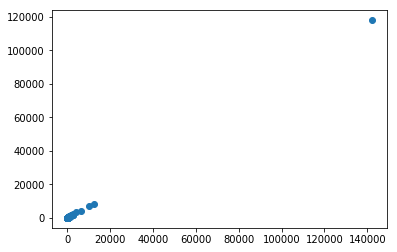

In [10]:
x = crime['Property_crime'].values.reshape(-1, 1)
y = crime['Larceny_theft']

plt.scatter(x, y)

Coefficients: 
 [0.82821967]
Intercept: 
 -19.43490209261347


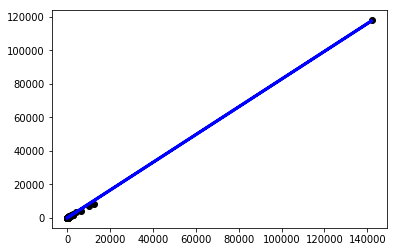

In [11]:
# Instantiate our model.
regr = linear_model.LinearRegression()


# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

In [12]:
crime.describe()

,Population,Violent_crime,Murder_manslaughter,Rape_2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson
count,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000
mean,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,448104.485,2803.177,18.225,60.166,1026.605,1698.804,7626.827,920.976,6318.799,401.691,7.795
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3010.500,2.000,0.000,0.000,0.000,1.000,41.000,6.000,31.000,0.000,0.000
50%,7411.000,6.000,0.000,0.000,1.000,5.000,114.000,18.000,95.000,2.000,1.872
75%,19324.500,22.000,0.000,2.000,5.000,14.500,343.000,52.500,290.000,7.000,1.872
max,8396126.000,52384.000,335.000,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [13]:
df = crime[['Property_crime', 'Population', 'Burglary', 'Larceny_theft', 'Robbery','Motor_theft']]



In [14]:
target = df['Property_crime']
data = df[['Population', 'Burglary', 'Larceny_theft', 'Robbery','Motor_theft']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2, random_state=0)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 245 to 176
Data columns (total 5 columns):
Population       280 non-null float64
Burglary         280 non-null float64
Larceny_theft    280 non-null float64
Robbery          280 non-null float64
Motor_theft      280 non-null float64
dtypes: float64(5)
memory usage: 13.1 KB


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

clrTree = DecisionTreeRegressor() 
clrTree = clrTree.fit(x_train, y_train) 
outTree = clrTree.predict(x_test)

clrKN = KNeighborsRegressor() 
clrKN = clrKN.fit(x_train, y_train) 
outKN = clrKN.predict(x_test)

from sklearn.model_selection import cross_val_score
print(cross_val_score(clrTree, data, target, cv=4).mean())


print("Accuracy for Decision Tree Regression: " + str(r2_score(y_test, outTree)*100)+"%") 
print("Accuracy for KNeighbors Regression: " + str(r2_score(y_test, outKN)*100)+"%")

0.7549791101938789
Accuracy for Decision Tree Regression: 98.33405588570147%
Accuracy for KNeighbors Regression: 77.99305889403003%


In [17]:
from sklearn.linear_model import LinearRegression

clrLin = LinearRegression() 
clrLin = clrLin.fit(x_train, y_train) 
outLin = clrLin.predict(x_test)

print("R-Squared for Decision Tree Regression: " + str(r2_score(y_test, outLin)*100)+"%") 


R-Squared for Decision Tree Regression: 100.0%


## Submit a notebook with your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

### The features I chose were Population, Burglary, Property_damage as a combination of larceny and motor theft. I chose these features because I believe they influence my data the most. I chose to leave out arson because while it is certainly a part of property crimes, it happens with such few occurences that I didn't feel it compared to the other crimes. I did do another model where I added it just to see and my model was less accurate. 